In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

Matplotlib is building the font cache; this may take a moment.


# Preparing The Data

In [5]:
import tensorflow as tf
import pathlib

data_dir = pathlib.Path("Processed Images_Fruits")
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 19526 files belonging to 3 classes.
Using 15621 files for training.
Found 19526 files belonging to 3 classes.
Using 3905 files for validation.
['Bad Quality_Fruits', 'Good Quality_Fruits', 'Mixed Qualit_Fruits']


In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(class_names), activation='softmax')(x)
fruit_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

fruit_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [8]:
history = fruit_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 1281s 3s/step - accuracy: 0.9073 - loss: 0.3810 - val_accuracy: 0.9716 - val_loss: 0.0754
Epoch 2/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 1720s 4s/step - accuracy: 0.9744 - loss: 0.0719 - val_accuracy: 0.9846 - val_loss: 0.0462
Epoch 3/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 408s 831ms/step - accuracy: 0.9804 - loss: 0.0522 - val_accuracy: 0.9834 - val_loss: 0.0515
Epoch 4/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 518s 1s/step - accuracy: 0.9806 - loss: 0.0555 - val_accuracy: 0.9872 - val_loss: 0.0365
Epoch 5/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 590s 1s/step - accuracy: 0.9910 - loss: 0.0254 - val_accuracy: 0.9887 - val_loss: 0.0400
Epoch 6/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 1219s 2s/step - accuracy: 0.9931 - loss: 0.0197 - val_accuracy: 0.9718 - val_loss: 0.1211
Epoch 7/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 1208s 2s/step - accuracy: 0.9871 - loss: 0.0480 - val_accuracy: 0.9787 - val_loss: 0.0780
Epoch 8/10
489/489 ━━━━━━━━━━━━━━━━━━━━ 1217s 2s/step - accuracy: 0.9936 - loss: 0.0185 - 

In [9]:
fruit_model.save('fruit_classification_model.h5')

In [11]:
import numpy as np
import cv2

def prepare_image(image_path, img_height=180, img_width=180):
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (img_height, img_width))
    image = np.expand_dims(image_resized, axis=0)
    return image

def predict_fruit(model, image_path, class_names):
    image = prepare_image(image_path)
    pred = model.predict(image)
    output_class = class_names[np.argmax(pred)]
    confidence = np.max(pred)
    return output_class, confidence

# Example usage
model = tf.keras.models.load_model('fruit_classification_model.h5')
image_path = 'Processed Images_Fruits/Bad Quality_Fruits/Guava_Bad/IMG_20190822_080152.jpg'
predicted_class, confidence = predict_fruit(model, image_path, class_names)
print(f"The predicted fruit is: {predicted_class} with confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step
The predicted fruit is: Bad Quality_Fruits with confidence: 1.00


# Evaluating The Model

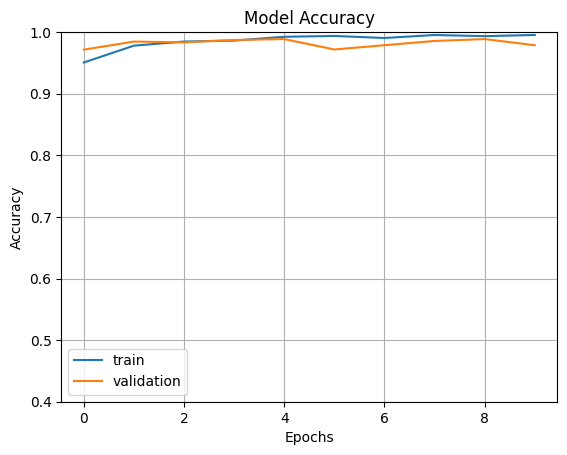

In [12]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

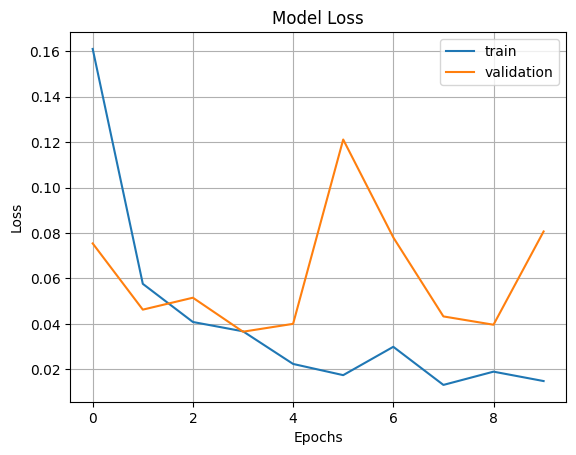

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

2024-10-21 00:33:51.788329: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


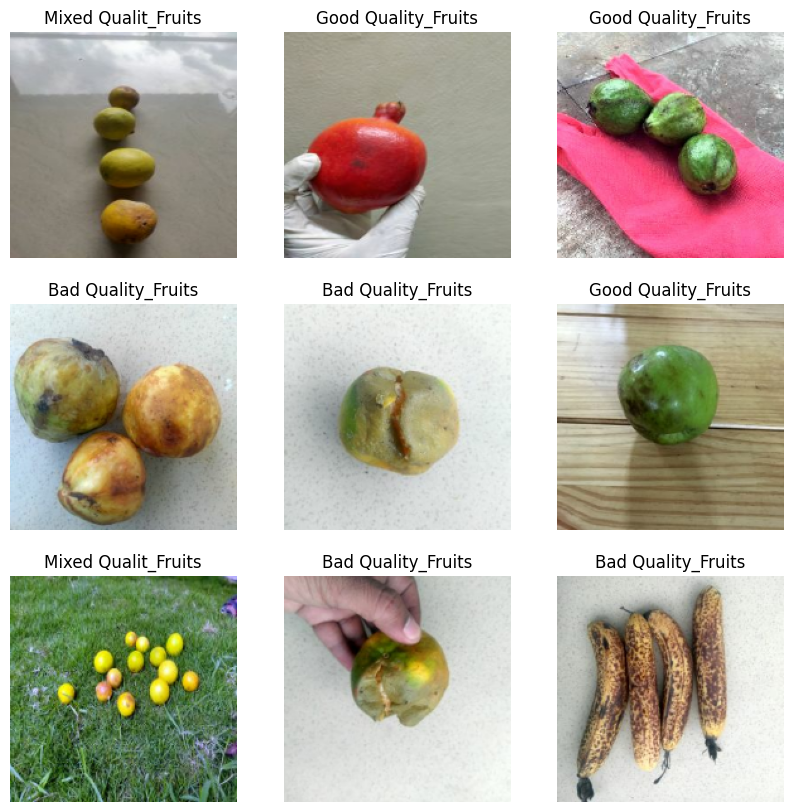

In [15]:
# ... existing imports and data loading code ...

# Add this code after loading your dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# ... rest of your existing code ...